In [309]:
import warnings
warnings.filterwarnings("ignore")

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import sqrt

from pandas.plotting import lag_plot

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing        # single Exponential Smoothing (SES)
from statsmodels.tsa.holtwinters import Holt                      # double Exponential Smoothing (holt method)
from statsmodels.tsa.holtwinters import ExponentialSmoothing        # triple Exponential Smoothing (holt winter method)

### 1. importing data

In [311]:
data = pd.read_csv("Airlines.csv")
data.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [312]:
# data = pd.read_csv("Airlines.csv", index_col='Month', parse_dates=True)              
# #data.index.freq = 'MS'
# data.head()

### 2.1 getting data ready

In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [314]:
#data['Month'].unique()

In [315]:
data.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [316]:
data.tail()

,Month,Passengers
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271
95,Dec-02,306


In [317]:
#so we have 96 months data and there is no null value

### 2.2 ploting of data

### 2.2.1 working on trend of data

<AxesSubplot:ylabel='Density'>

<Figure size 864x576 with 0 Axes>

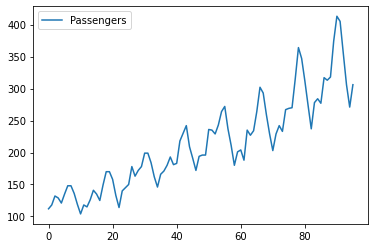

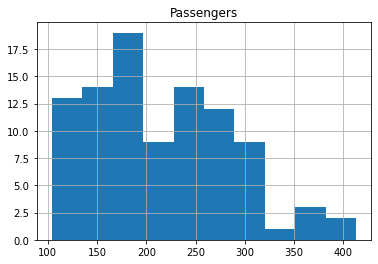

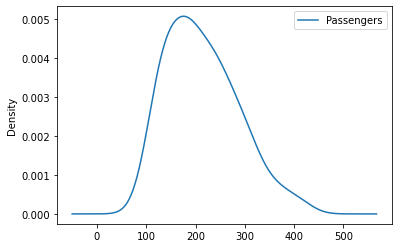

In [318]:
#figsize = plt.figaspect(0.618) 
plt.figure(figsize=(12,8))
data.plot()
data.hist()
data.plot(kind='kde')

In [319]:
# there is a trend 
# there is seasonality 

In [320]:
#note : trend of data is not linear, lets make it linear by taking square root

#### a) square root transform

In [321]:
data['Passengers'] = sqrt(data['Passengers'])
data.head()

,Month,Passengers
0,Jan-95,10.583005
1,Feb-95,10.862780
2,Mar-95,11.489125
3,Apr-95,11.357817
4,May-95,11.000000


<AxesSubplot:ylabel='Density'>

<Figure size 864x576 with 0 Axes>

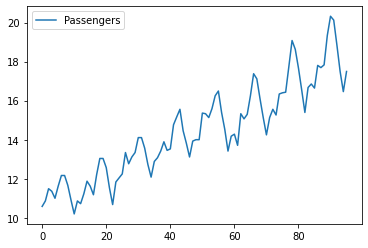

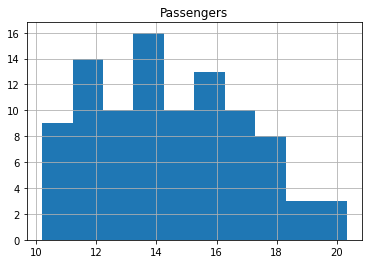

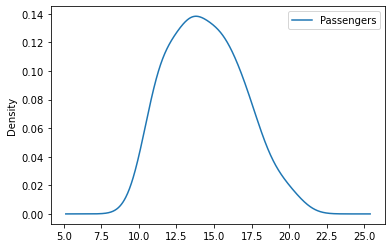

In [322]:
#figsize = plt.figaspect(0.618) 
plt.figure(figsize=(12,8))
data.plot()
data.hist()
data.plot(kind='kde')

In [323]:
#note : now trend look like to be linear

### 2.2.2 working on seasonality of data

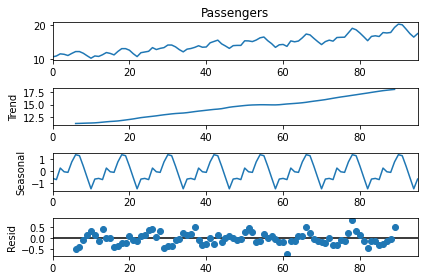

In [324]:
figsize = plt.figaspect(0.618) 
decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

In [325]:
#i can clearly see seasonality in data

### 2.2.3 lag plot

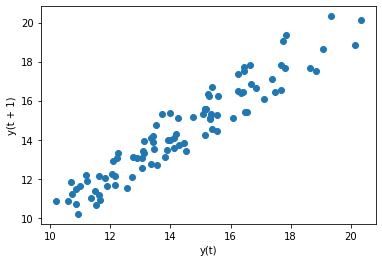

In [326]:
lag_plot(data['Passengers'])
plt.show()

### 2.2.4 AcF and PACF

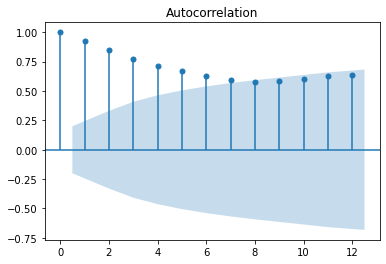

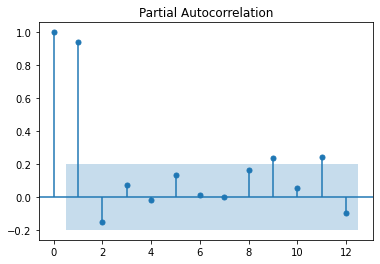

In [327]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show()

### 2.3 splitting the data

In [328]:
train_data = data.iloc[:76]
test_data = data.iloc[76:]

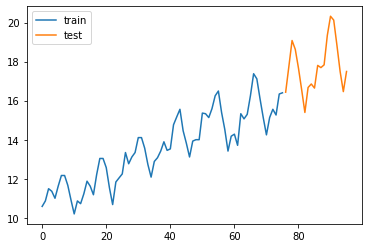

In [329]:
#figsize = plt.figaspect(0.618) 
#plt.figure(figsize=(12,8))
train_data['Passengers'].plot(legend=True, label='train'),
test_data['Passengers'].plot(legend=True, label='test');
#plt.plot()

In [330]:
# 1) we have done square root tranformation
# 2) there is trend in data
# 3) there is seasonality in data

# we go with smoothing technique (Holt-Winter method)

### 3. building model

#### a) fit the model

In [331]:
model = ExponentialSmoothing(train_data["Passengers"], trend="add", seasonal="mul", seasonal_periods=12) #add the trend to the model
model_fit = model.fit()

In [332]:
par = model.params
par

{'smoothing_level': 0.5677569334420174,
 'smoothing_trend': 7.996876709701049e-14,
 'smoothing_seasonal': 0.0,
 'damping_trend': nan,
 'initial_level': 12.63040053231402,
 'initial_trend': 0.07837866348663272,
 'initial_seasons': array([0.83689984, 0.83469452, 0.89468142, 0.87629444, 0.86789811,
        0.9119013 , 0.95433024, 0.95358919, 0.89686677, 0.83875859,
        0.78264443, 0.83161248]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

#### b) forecasting the test data

In [333]:
test_pred  = model_fit.forecast(20)
test_pred

76    16.205992
77    17.099124
78    17.969511
79    18.030298
80    17.028096
81    15.990583
82    14.982132
83    15.984707
84    16.151932
85    16.174792
86    17.407348
87    17.118285
88    17.022288
89    17.956807
90    18.867100
91    18.927191
92    17.871638
93    16.779472
94    15.718244
95    16.766875
dtype: float64

In [334]:
#note : we can also use prediction for test data *****************************

# test_pred  = model.predict(par, start = test_data['Passengers'].index[0], end = test_data['Passengers'].index[-1])
# test_pred

In [335]:
test_prediction = pd.DataFrame()
test_prediction['month'] = test_data.Month
test_prediction['Passengers'] = test_data.Passengers
test_prediction['test_pred_passengers'] = test_pred
test_prediction

,month,Passengers,test_pred_passengers
76,May-01,16.431677,16.205992
77,Jun-01,17.748239,17.099124
78,Jul-01,19.078784,17.969511
79,Aug-01,18.627936,18.030298
80,Sep-01,17.663522,17.028096
81,Oct-01,16.552945,15.990583
82,Nov-01,15.394804,14.982132
83,Dec-01,16.673332,15.984707
84,Jan-02,16.852300,16.151932
85,Feb-02,16.643317,16.174792


#### d) visualising the original test  data and predicted test data

[]

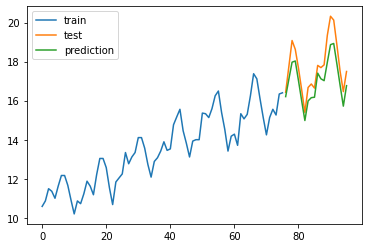

In [336]:
figsize = plt.figaspect(0.618) 
#plt.figure(figsize=(12,8))
train_data['Passengers'].plot(legend=True, label='train')
test_data['Passengers'].plot(legend=True, label='test')
test_prediction['test_pred_passengers'].plot(legend=True, label='prediction')
plt.plot()

In [337]:
#so trend for original test data and predicted test data is  nearly same

#### e) transforming sqrt to original form of data for test prediction DataFrame 

In [338]:
test_prediction['Passengers'] = np.square(test_prediction['Passengers'])
test_prediction['test_pred_passengers'] = np.square(test_prediction['test_pred_passengers'])
test_prediction.head()

,month,Passengers,test_pred_passengers
76,May-01,270.0,262.634180
77,Jun-01,315.0,292.380032
78,Jul-01,364.0,322.903316
79,Aug-01,347.0,325.091655
80,Sep-01,312.0,289.956047


#### e) evaluation of metrics

In [339]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_prediction['Passengers'],test_prediction['test_pred_passengers'])         #MSE

876.7582765104105

In [340]:
np.sqrt(mean_squared_error(test_prediction['Passengers'],test_prediction['test_pred_passengers'])) #RMSE

29.61010429752672

### 4. final model (forecasting into future)

#### a) fit the model

In [341]:
model = ExponentialSmoothing(data["Passengers"], trend="add", seasonal="mul", seasonal_periods=12) #add the trend to the model
model_fit = model.fit()

#### b) forecasting 

In [342]:
fore  = model_fit.forecast(20)
fore

96     17.699119
97     17.666925
98     18.980850
99     18.691696
100    18.666105
101    19.862274
102    20.940588
103    20.845902
104    19.654537
105    18.398153
106    17.219781
107    18.392417
108    18.577730
109    18.540324
110    19.915356
111    19.608206
112    19.577635
113    20.828286
114    21.954933
115    21.851601
dtype: float64

#### c) visualisation of data

<AxesSubplot:>

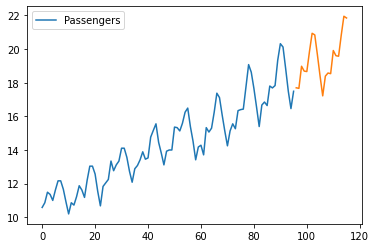

In [343]:
data.plot()
fore.plot()

#### d) transforming data from sqrt to original form

In [344]:
data['Passengers'] = np.square(data['Passengers']) 
fore = np.square(fore)

In [345]:
data.head()

,Month,Passengers
0,Jan-95,112.0
1,Feb-95,118.0
2,Mar-95,132.0
3,Apr-95,129.0
4,May-95,121.0


In [346]:
fore

96     313.258813
97     312.120224
98     360.272667
99     349.379501
100    348.423482
101    394.509936
102    438.508212
103    434.551621
104    386.300841
105    338.492048
106    296.520844
107    338.280997
108    345.132046
109    343.743621
110    396.621412
111    384.481730
112    383.283808
113    433.817512
114    482.019087
115    477.492470
dtype: float64

<AxesSubplot:>

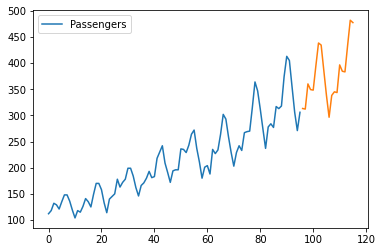

In [347]:
data.plot()
fore.plot()